In [4]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_df = "mouse_data.csv"
clinical_df= "clinical_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_df)
clinical_df = pd.read_csv(clinical_df)

mouse_df.head()
clinical_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Combine the data into a single dataset
combined_data = pd.merge(clinical_df,mouse_df, how="left", on=["Mouse ID", "Mouse ID"])
combined_data.head()
# Display the data table for preview

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [6]:
drug_group = combined_data.groupby(["Drug", "Timepoint"])
mean_tumor = drug_group["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
mean_tumor_df = pd.DataFrame({"Mean Tumor Volume (mm3)" : mean_tumor})
sem_tumor = drug_group["Tumor Volume (mm3)"].sem()
sem_tumor_df = pd.DataFrame({"Mean Tumor Volume (mm3)" : sem_tumor})

# 1.5 Preview DataFrame
sem_tumor_df.head()

Mean Tumor Volume (mm3)
Drug      Timepoint                         
Capomulin 0                         0.000000
          5                         0.448593
          10                        0.702684
          15                        0.838617
          20                        0.909731

In [12]:
# Minor Data Munging to Re-Format the Data Frames
#mean_tumor_df = mean_tumor_df.reset_index()
#sem_tumor_df = sem_tumor_df.reset_index()
tumor_pivot = pd.pivot_table(mean_tumor_df,values="Mean Tumor Volume (mm3)", index="Timepoint", columns="Drug")
tumor_pivot2 = pd.pivot_table(sem_tumor_df,values="Mean Tumor Volume (mm3)", index="Timepoint", columns="Drug")
# Preview that Reformatting worked
tumor_pivot2

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


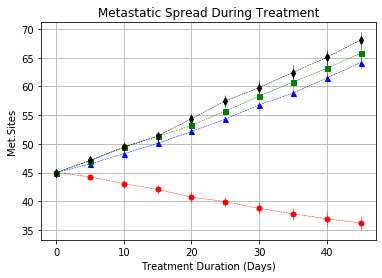

In [14]:
# Generate the Plot (with Error Bars)
plt.errorbar(tumor_pivot.index, tumor_pivot["Capomulin"], 
             yerr=tumor_pivot2["Capomulin"], color="r", 
             marker="o", markersize=5, linestyle="dashed", 
             linewidth=0.50)

plt.errorbar(tumor_pivot.index, tumor_pivot["Ceftamin"], 
             yerr=tumor_pivot2["Ceftamin"], color="b", 
             marker="^", markersize=5, linestyle="dashed", 
             linewidth=0.50)

plt.errorbar(tumor_pivot.index, tumor_pivot["Infubinol"], 
             yerr=tumor_pivot2["Infubinol"], color="g", 
             marker="s", markersize=5, linestyle="dashed", 
             linewidth=0.50)

plt.errorbar(tumor_pivot.index, tumor_pivot["Placebo"], 
             yerr=tumor_pivot2["Placebo"], color="k", 
             marker="d", markersize=5, linestyle="dashed", 
             linewidth=0.50)

# Proper formatting
plt.title("Metastatic Spread During Treatment")
plt.ylabel("Met.Sites")
plt.xlabel("Treatment Duration (Days)")
plt.grid(True)
#plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("task2_1.png")

# Show the Figure
plt.show()
# Save the Figure



In [ ]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [ ]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [ ]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)